In [78]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [79]:
mean_01 = [2,3]
cov_01 = [[1,-0.5],[-0.5,2]]

mean_02 = [6,3]
cov_02 = [[2,0.35],[0.35,2]]

dist_01 = np.random.multivariate_normal(mean_01 , cov_01 , 500)
dist_02 = np.random.multivariate_normal(mean_02 , cov_02 , 500)

print(dist_01.shape,dist_02.shape)

(500, 2) (500, 2)


In [80]:
dataset = np.zeros((dist_01.shape[0]+dist_02.shape[0] , dist_01.shape[1]))
dataset.shape

(1000, 2)

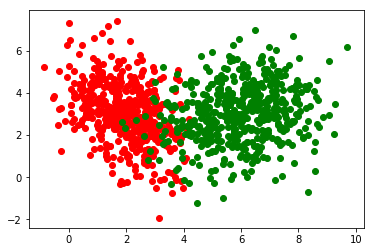

In [81]:
plt.figure()
plt.scatter(dist_01[: ,0] , dist_01[: ,1] , color = 'red')
plt.scatter(dist_02[: ,0] , dist_02[: ,1] , color = 'green')
plt.show()

In [82]:
dataset[:dist_01.shape[0] , :] = dist_01
dataset[dist_01.shape[0]: , :] = dist_02

print(dataset.shape)

(1000, 2)


In [83]:
class Cluster:
    Cid = 0
    def __init__(self , center , color):
        self.center = center
        self.color = color
        self.points = list()
        self.id = Cluster.Cid
        Cluster.Cid+=1
        
    def update_center(self):
        if not self.points:
            return self.center
        new_center = np.array(self.points).mean(axis=0)
        self.center = new_center
        return self.center

In [84]:
class KMeans:
    
    def __init__(self , dataset , centers , colors):
        self.centers = centers
        self.colors = colors
        self.dataset = dataset
        self.inertias = list()
        self.clusters = list()
        
        for center,color in zip(centers,colors):
            cluster = Cluster(center , color)
            self.clusters.append(cluster)
    
    def assign_points_to_clusters(self):
        for cluster in self.clusters:
            cluster.points = list()
            
        for point in self.dataset:
            distances = []
            for cluster in self.clusters:
                d = KMeans.euclidean(point , cluster.center)
                distances.append((d,cluster))
            
            distances = sorted(distances , key = lambda x:x[0])
            nearest_cluster = distances[0][1]
            nearest_cluster.points.append(point)
            
    def center_updation(self):
        new_center= []
        for cluster in self.clusters:
            new_allocated_center = cluster.update_center()
            new_center.append(new_allocated_center)
        self.centers = np.array(new_center)
        
    def calculate_inertia(self):
        inertia = 0        
        for cluster in self.clusters:
            for point in cluster.points:
                inertia += KMeans.euclidean(point, cluster.center)
                
        self.inertias.append(inertia)
        return inertia
    
    def execute(self , iterations=1):
        for i in range(iterations):
            self.assign_points_to_clusters()
            self.center_updation()
            self.calculate_inertia()
            
        
        
    @staticmethod  
    def euclidean(p1,p2):
        return np.sqrt(np.sum((p1-p2)**2))
    
    
            

In [85]:
#Execution of kmeans
k=5
random_center = np.random.uniform(low = dataset.min() , high = dataset.max() , size = ((k,dataset.shape[1])))
print(random_center)
colors = ['red' , 'green','yellow','blue', 'pink']

[[8.47433875 1.18115287]
 [3.76565986 4.47208949]
 [6.76060848 4.43985966]
 [8.68008862 5.88359894]
 [9.28533832 8.06538563]]


In [86]:
kmeans = KMeans(dataset ,random_center, colors)


In [87]:
def plot_itereatively(iterations):
    for i in range(iterations):
        kmeans.execute()
        plt.figure()
        plt.title("Iteration {}".format(i))
        for cluster in kmeans.clusters:
            
            points = np.array(cluster.points)
            if not cluster.points:
                continue
            plt.scatter(points[:, 0], points[:, 1], color=cluster.color)
            plt.scatter(cluster.center[0], cluster.center[1], color='black', marker='^', s=100)
            
        print("Inertia at {} iteration is {} : - ".format(i , kmeans.inertias))
            
        plt.show()
    

Inertia at 0 iteration is [1517.9299338714318] : - 


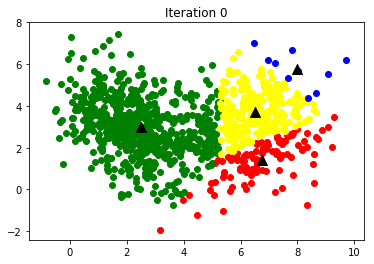

Inertia at 1 iteration is [1517.9299338714318, 1385.502615298633] : - 


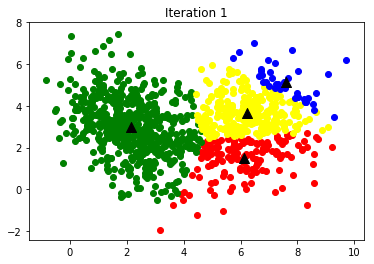

Inertia at 2 iteration is [1517.9299338714318, 1385.502615298633, 1333.8979647760495] : - 


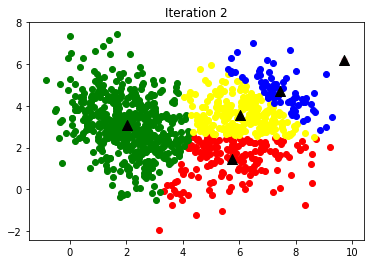

Inertia at 3 iteration is [1517.9299338714318, 1385.502615298633, 1333.8979647760495, 1311.760671919191] : - 


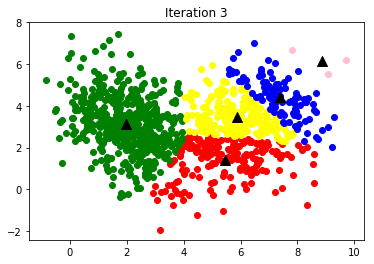

Inertia at 4 iteration is [1517.9299338714318, 1385.502615298633, 1333.8979647760495, 1311.760671919191, 1292.8487477206693] : - 


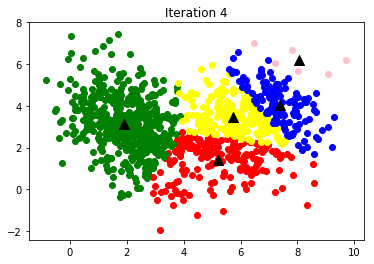

Inertia at 5 iteration is [1517.9299338714318, 1385.502615298633, 1333.8979647760495, 1311.760671919191, 1292.8487477206693, 1264.1877736494953] : - 


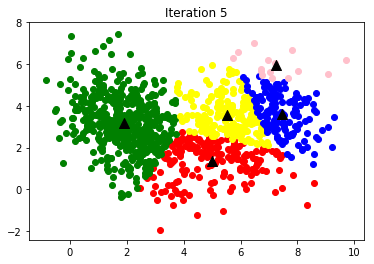

Inertia at 6 iteration is [1517.9299338714318, 1385.502615298633, 1333.8979647760495, 1311.760671919191, 1292.8487477206693, 1264.1877736494953, 1224.8763442308327] : - 


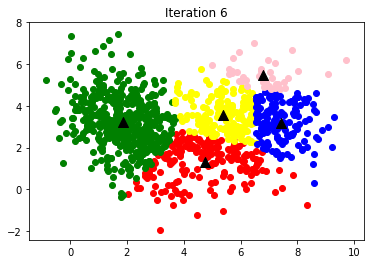

Inertia at 7 iteration is [1517.9299338714318, 1385.502615298633, 1333.8979647760495, 1311.760671919191, 1292.8487477206693, 1264.1877736494953, 1224.8763442308327, 1201.9015596917206] : - 


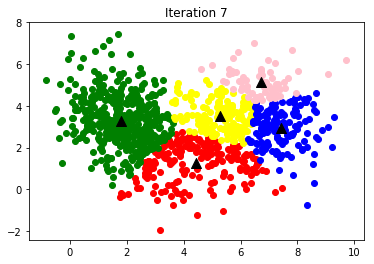

Inertia at 8 iteration is [1517.9299338714318, 1385.502615298633, 1333.8979647760495, 1311.760671919191, 1292.8487477206693, 1264.1877736494953, 1224.8763442308327, 1201.9015596917206, 1187.446603023276] : - 


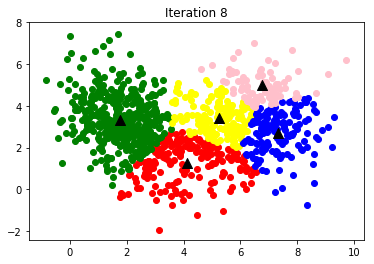

Inertia at 9 iteration is [1517.9299338714318, 1385.502615298633, 1333.8979647760495, 1311.760671919191, 1292.8487477206693, 1264.1877736494953, 1224.8763442308327, 1201.9015596917206, 1187.446603023276, 1166.671185303929] : - 


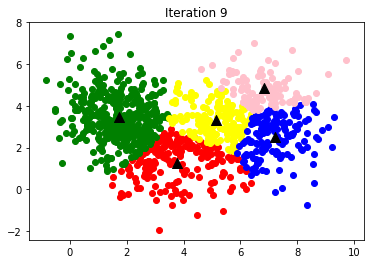

In [88]:
plot_itereatively(10)

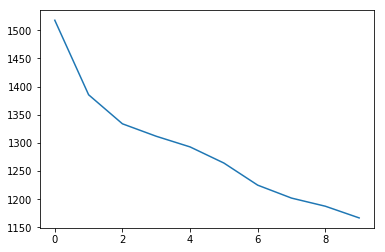

In [89]:
plt.figure()
plt.plot(kmeans.inertias)
plt.show()

# Sklearn

In [90]:
from sklearn.cluster import KMeans as SK_KMeans
sk_mean = SK_KMeans(n_clusters=5)
sk_mean.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [94]:
sk_mean.labels_.shape

(1000,)

In [92]:
sk_mean.cluster_centers_

array([[6.21014925, 1.58392685],
       [2.57795605, 1.72584517],
       [7.09998496, 4.0206563 ],
       [4.77443658, 3.33780955],
       [1.50362679, 3.92831068]])

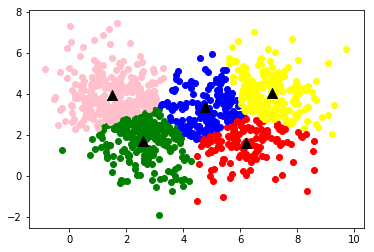

In [93]:
plt.figure()
for point,label in zip(dataset, sk_mean.labels_):
    plt.scatter(point[0], point[1], color=colors[label])
for center in sk_mean.cluster_centers_:
    plt.scatter(center[0], center[1], color='black', marker='^', s=100)
plt.show()